<a href="https://colab.research.google.com/github/kirankokateGitHub/Regression2/blob/main/Kiran_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Kiran

# **Project Summary -**



During our analysis, we began by performing Exploratory Data Analysis (EDA) on all the features in our dataset. We started with the dependent variable, 'Rented Bike Count,' and applied necessary transformations. Afterwards, we proceeded to analyze the categorical variables, dropping those with a dominant single class. Additionally, we examined the numerical variables, investigating their correlation, distribution, and relationship with the dependent variable. Certain numerical features with predominantly 0 values were removed, and we applied one-hot encoding to the categorical variables.

Moving forward, we implemented three machine learning algorithms, namely Linear Regression, Lasso and Ridge. To enhance our model's performance, we performed hyperparameter tuning but it yielded with no positive site. Beacause after hyperparameter tuning, the changes in the evaluation metrics were negligible:

MSE: Increased from 33.349 to 33.366
RMSE: Increased from 5.775 to 5.776
MAE: Increased from 4.429 to 4.431
R-squared (R2): Decreased slightly from 0.783 to 0.783
Adjusted R-squared: Decreased slightly from 0.779 to 0.779
In summary, the hyperparameter tuning had minimal impact on the model's performance, and both the tuned and untuned models are similar in predictive capabilities.

Based on comparision of implemented three evalution matrixs, it appears that the Linear regression model outperforms Lasso and Ridge regression models for the given dataset. It has lower errors (MAE (4.28), MSE(35.22), RMSE(5.935)) and better goodness-of-fit metrics (R2 score (0.774) and Adjusted R2(0.77) ) on both the training and test datasets. Therefore, the Linear regression model is likely the most appropriate choice among the three models for making predictions on this bike sharing demand data.

Nevertheless, this is not the final conclusion. Given the time-dependent nature of the data, variables such as temperature, windspeed, and solar radiation may exhibit inconsistencies over time. Consequently, there will be instances where the model's performance may suffer. As Machine Learning is continuously advancing, it is essential to remain vigilant and prepared for any unforeseen circumstances. Regularly monitoring and updating our model will be crucial to its success. Thus, possessing a solid foundation of knowledge and staying abreast of the ever-evolving ML landscape will undoubtedly provide an advantage for the future.

# **GitHub Link -**

https://github.com/kirankokateGitHub/Regression2

# **Problem Statement**


**Write Problem Statement Here.**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [2]:
# lets import required libraries

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import datetime from datetime
from datetime import datetime
import datetime as dt
# import some preprocessing functions and modules from scikit library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
# lets import some regression ML models/algoriths from scikit library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# import some modules to check accuracy of the model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# import some modules to check accuracy of the model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
# import warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/SeoulBikeData.csv"
bkdf= pd.read_csv(path, encoding= 'latin') # bike dataframed is named as bkdf for easy typing

## *** Know Your Data***

In [6]:
# let's see top 5 rows of the dataframe
bkdf.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
# let's see bottom 5 rows of dataframe
bkdf.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [8]:
#let's look at the some random sample from the data
bkdf.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4500  06/06/2018               1400    12             27.3           51   
1857  16/02/2018                 48     9             -4.3           33   
8557  22/11/2018                678    13              6.5           26   
2419  11/03/2018                596    19              7.8           28   
5158  03/07/2018               1948    22             26.9           78   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4500               2.8               703                       16.2   
1857               0.7              1923                      -18.2   
8557               2.4              1974                      -11.6   
2419               1.9              1982                       -9.6   
5158               0.6              1806                       22.7   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4500                     3.16           0.0            0.0  Summer   
1857                     0.60           0.0            0.0  Winter   
8557                     1.84           0.0            0.0  Autumn   
2419                     0.04           0.0            0.0  Spring   
5158                     0.00           0.0            0.0  Summer   

         Holiday Functioning Day  
4500     Holiday             Yes  
1857     Holiday             Yes  
8557  No Holiday             Yes  
2419  No Holiday             Yes  
5158  No Holiday             Yes

In [9]:
# now let's get know about the dataframe shape i.e rows and colomns
print(bkdf.shape)

(8760, 14)


In [10]:
# so, we have 8760 rows and 14 colomns in our dataframe

In [11]:
bkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
# so, we have four colomns which have object values and others have number values. data set has no null values.

In [13]:
bkdf.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [14]:
# here we can see how unique values are pressent in colomns of dataframe.

In [15]:
# let's get know about the details of the dataframe
bkdf.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [16]:
# let's know about the colomns/variable/features of the dataframe
print(bkdf.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [17]:
# let's give brief description about the features

**Breakdown of Our variables/Features/columns:**
**Date** : *The date of the day, in a 365 days from 01/12/2017 to 30/11/2018,  let's formate in DD/MM/YYYY, data type : str*, we need to convert it into datetime format.

**Rented Bike Count** : *Number of bikes rented per hour which is our dependent variable and we need to predict it, data type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, data type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in degree Celsius, data type : Float*

**Humidity(%)**: * air Humidity in %, data type : int*

**Wind speed (m/s)** : *Speed of the blowing wind in m/s,
data type : Float*

**Visibility (10m)**: *Visibility in m, data type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, data type : Float*

**Solar Radiation (MJ/m2)**: *solar radition, data type : Float*

**Rainfall(mm)**: *depth of rainfall in mm, data type : Float*

**Snowfall (cm)**: *depth of snowfall in cm, data type : Float*

**Seasons**: *Season of the year, data type : str, there are only 4 season's in data *.

**Holiday**: *If the day  is holiday period or not, data type: str*

**Functioning Day**: *If the day is a Functioning Day or not, data type : str*






In [18]:
# As we know there are mno missing values but, let's cross check ones.
bkdf.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [19]:
# yeah, it is clear that there are no null or missing values in the dataframe.

In [20]:
# let's check for duplicate values.
bkdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [21]:
dupicate_values= len(bkdf[bkdf.duplicated()])

In [22]:
print(dupicate_values)

0


In [23]:
# so, there are no duplicate vales in dataframe.

##Breaking date column

* ***Python reads "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users' behaviour so we need to convert it into datetime format, then we split it into 3 columns i.e 'year', 'month', 'day'as a category data type.***





In [24]:
# Changing the "Date" column into three new columns i.e "year","month" & "day" column
bkdf['Date'] = bkdf['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [25]:
bkdf['year'] = bkdf['Date'].dt.year
bkdf['month'] = bkdf['Date'].dt.month
bkdf['day'] = bkdf['Date'].dt.day_name()

In [26]:
#creating a new column as "weekdays_weekend" and drop the columns "Date","day" and "year"
bkdf['weekdays_weekend']=bkdf['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bkdf=bkdf.drop(columns=['Date','day','year'],axis=1)

* ***So, initially we have converted the "date" column into 3 different columns i.e "year","month" & "day".***
* ***The "year" column in our data set is basically containing the 2 unique numbers, contains the details since 2017 december ans upto 2018 november. so, if we consider this is a one year then, we don't need the "year" column, and so we can drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need data of each day of each month, but we need the data about, if a day is a weekday or a weekend day, so we have converted it into this format and dropped the "day" column***.

In [27]:
#now let's take a look at our data set

In [28]:
bkdf.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [29]:
bkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [30]:
bkdf['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

##Changing data type

* ***As "Hour","month","weekdays_weekend" column are in integer data type format but actually it is a category data type. so we need to change this data type, so as, while doing the further anlysis work.***

In [31]:
# let's see how inique values are present in columns.

In [32]:
bkdf.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [33]:
# let's change columns having data type 'int64' into categorical columns. columns hour, month and weekdays_weekend will be converted into categorical columns, for this we are going to use 'for' loop.

In [34]:
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bkdf[col]=bkdf[col].astype('category')

In [35]:
# let's see the changed data types of selective columns.
bkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [36]:
# let's see unique values in weekdays_weekend column.
bkdf['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

# **Exploratory Data Analysis Of The Data Set**

**Why we need to perform EDA?**
* ***An EDA is a thorough examination done to uncover the underlying pattern of the data set and is important for the company because as it exposes trends, patterns, and relationships among  the variables.***

[Text(0.5, 1.0, 'Count of Rented bikes in respective Month ')]

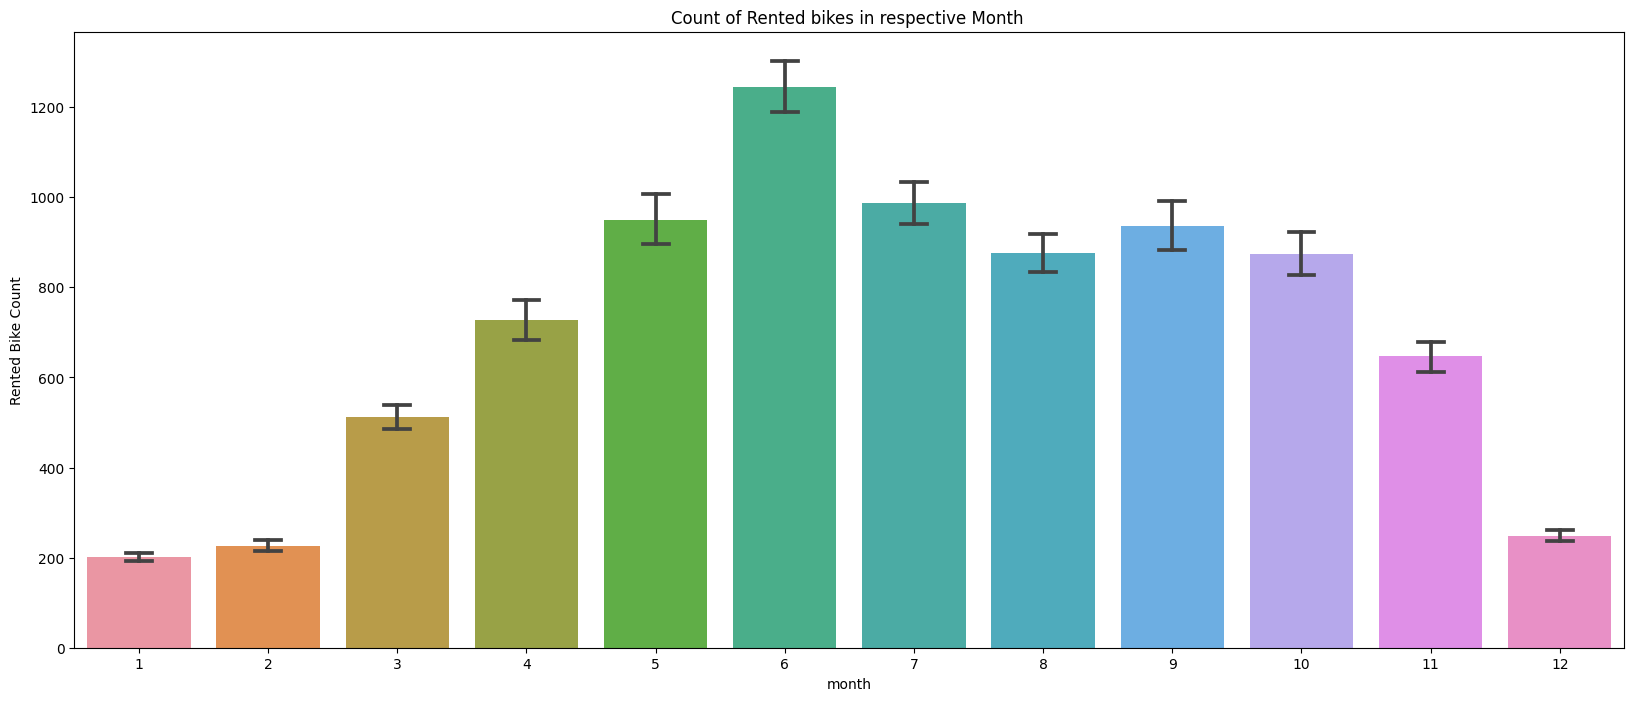

In [37]:
# let's see Count of Rented bikes in respective Month.
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bkdf,x='month',y='Rented Bike Count',ax=ax,capsize=0.2)
ax.set(title='Count of Rented bikes in respective Month ')

* ***Why selected this specific chart?***

this chart is selected to show the demand behaviour for rented bikes across the year in respective month.

* ***What insights found from this chart?***

highest demand for rented bikes is found in sixth month os the year. month 5th to 10th have most demands that other months in the year. month 1st, 2nd and 12th faound with least demand for rented bikes. demand for rental bikes will never be less than 200 in any month of the year.

* ***Will this insights lead any positive impact?***

yeah, form this we can plan for new purchase for bikes and we can schedule our bike repair and maintenance work acording the demand surges and falls.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend days')]

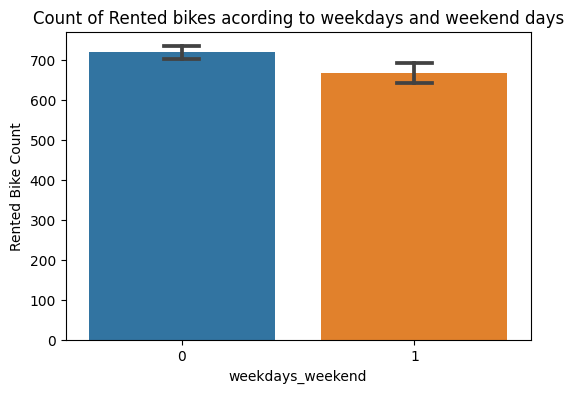

In [38]:
# Let's see Count of Rented bikes acording to weekdays and weekend days.
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=bkdf,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count of Rented bikes acording to weekdays and weekend days')

* ***Why selected this specific chart?***

To see is there any difference between weekends and weekdays count for rental bikes demand.

* ***What insights found from this chart?***

From the graph it is clear that on weekdays there is more demand for bikes than that's on weekends. But, there is no marginal difference for demands of rental bikes on weekdays and weekends.

* ***Will this insights lead any positive impact?***

yeah, but not any strong positive leads we got.

[Text(0.5, 1.0, 'Count of Rented bikes acording to hour ')]

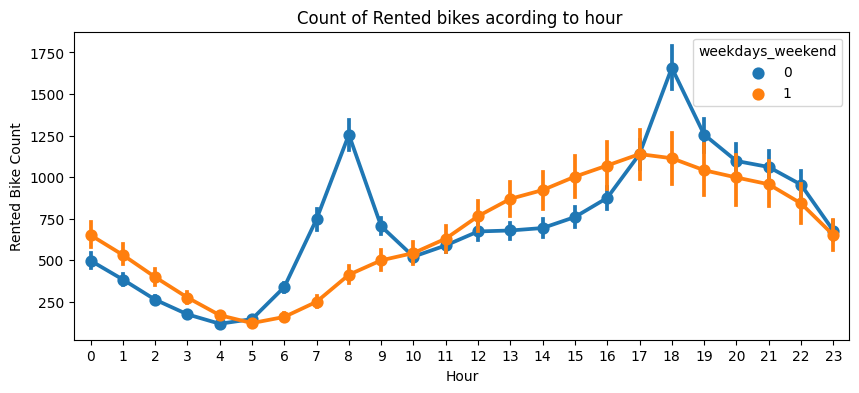

In [39]:
# Let's see poingraph for count of rental bikes according to hour.
fig,ax=plt.subplots(figsize=(10,4))
sns.pointplot(data=bkdf,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to hour ')

* ***Why selected this specific chart?***

To see is the behaviour of demand for rental bikes according to hour.

* ***What insights found from this chart?***

From the graph it is clear that on the weeekdays there is high demand at morning from 7 to 9 may be due to office times and at 6 pm there is also high demannd may be due to commenncement of offices. for the case of weekends the demand is found hyper at the evening times.

* ***Will this insights lead any positive impact?***

yes this will help us to plan repair and maintenance work of bikes.

In [40]:
# see the values for functioning days
bkdf['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

[Text(0.5, 1.0, 'Count ofor Rental bikes acording to Functioning Day ')]

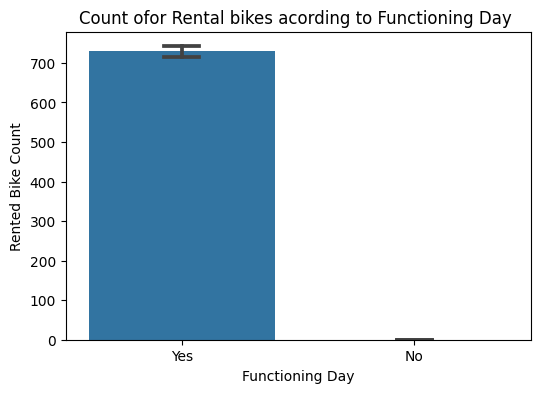

In [41]:
# let's see the count of rental bikes for functioning day.
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=bkdf,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count ofor Rental bikes acording to Functioning Day ')

* ***Why selected this specific chart?***

To show the behaviour of demand for rental bikes according to functioning day.

* ***What insights found from this chart?***

From the graph it is clear that on functioning day there is a good demand for bikes almost 720 counts are observed, but that is on 'no' functioning day is almost nothing. it is clear that on no functioning days we can also take part of rest as there is no much business and work to do

* ***Will this insights lead any positive impact?***

yes, but no any strong leads have found for considerable decisions. yes, it is clear that on no functioning days we can also take part of rest as there is no much business and work to do.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Season of the year')]

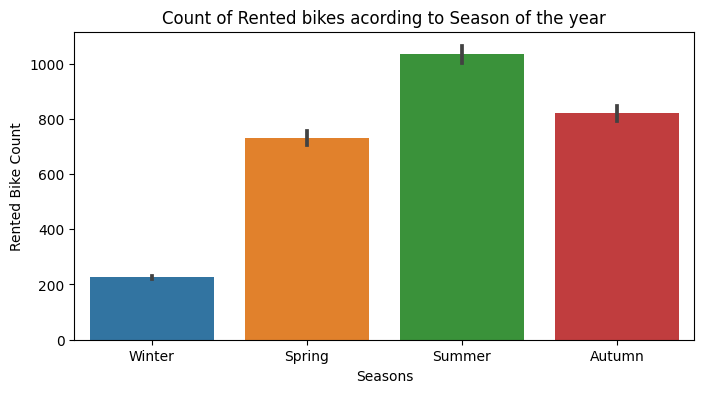

In [42]:
# Let's see count of rented bikes according to the season of year.
fig,ax=plt.subplots(figsize=(8,4))
sns.barplot(data=bkdf,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Season of the year')

* ***Why selected this specific chart?***

To show the behaviour of demand for rental bikes according to season of the year.

* ***What insights found from this chart?***

From the graph it is clear that in the summer season there is highest demand for bikes almost 1000 counts are noticed, and for the season of winter there is least demand for bikes i.e 200 counts.

* ***Will this insights lead any positive impact?***

yes, we can suggest that company has no need to make any new purchase of bikes in the winter as there will be no high demands.

##**Analysis of Numerical variables**

In [43]:
# Assign the numerical coulmns to variavles of the dataframe to make it processable for futher analysis and modelling.
numerical_col=list(bkdf.select_dtypes(['int64','float64']).columns)
numerical_feat=pd.Index(numerical_col)
numerical_feat

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

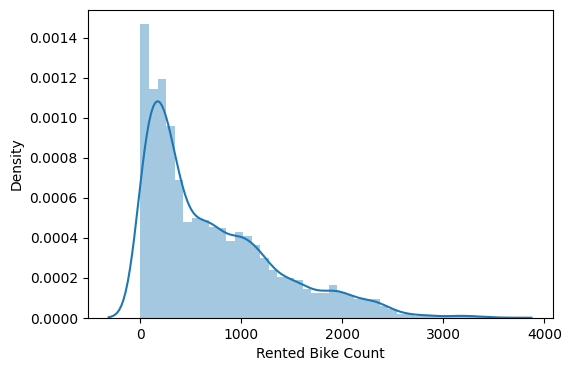

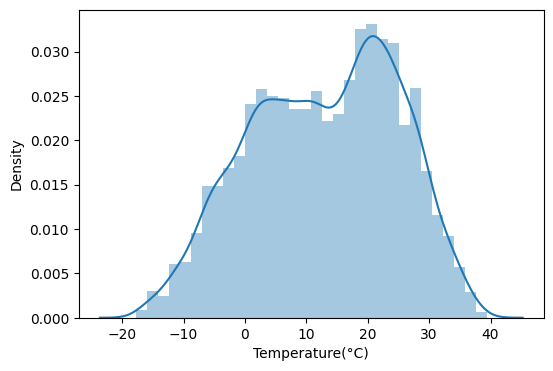

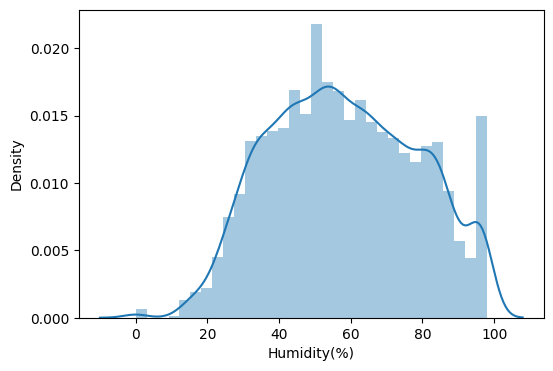

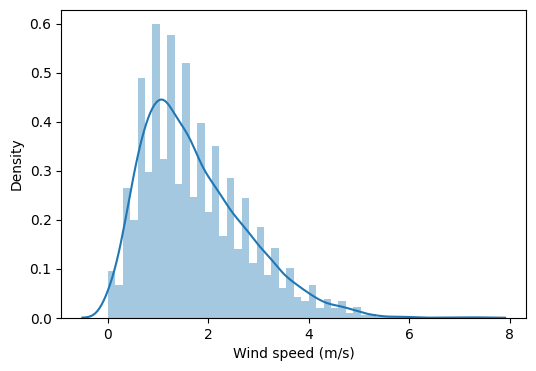

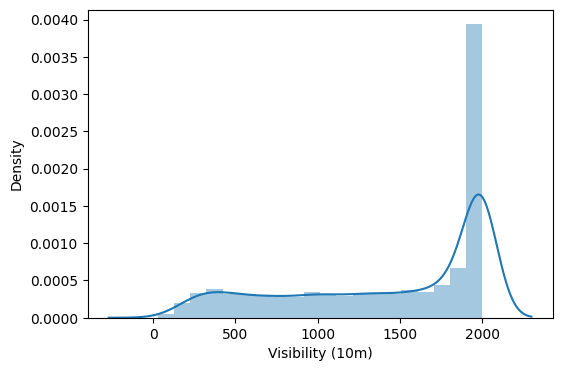

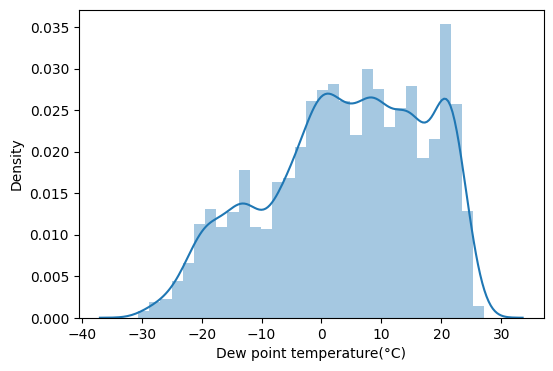

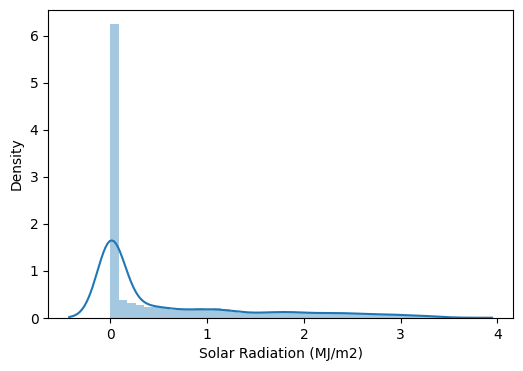

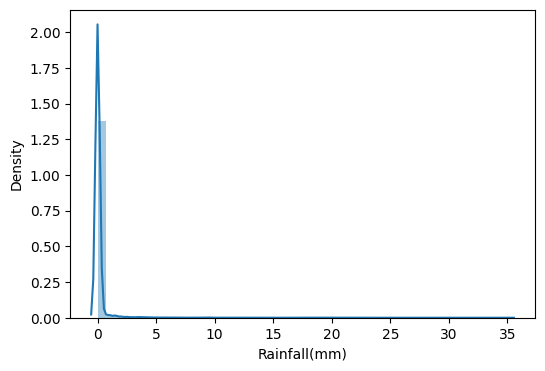

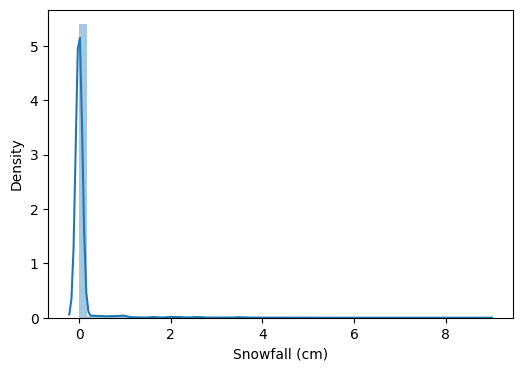

In [44]:
# let's see the distribution of all the numerical features of the dataframe. For this we are going to use the 'For' loop.
for col in numerical_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=bkdf[col])
  plt.xlabel(col)
plt.show()

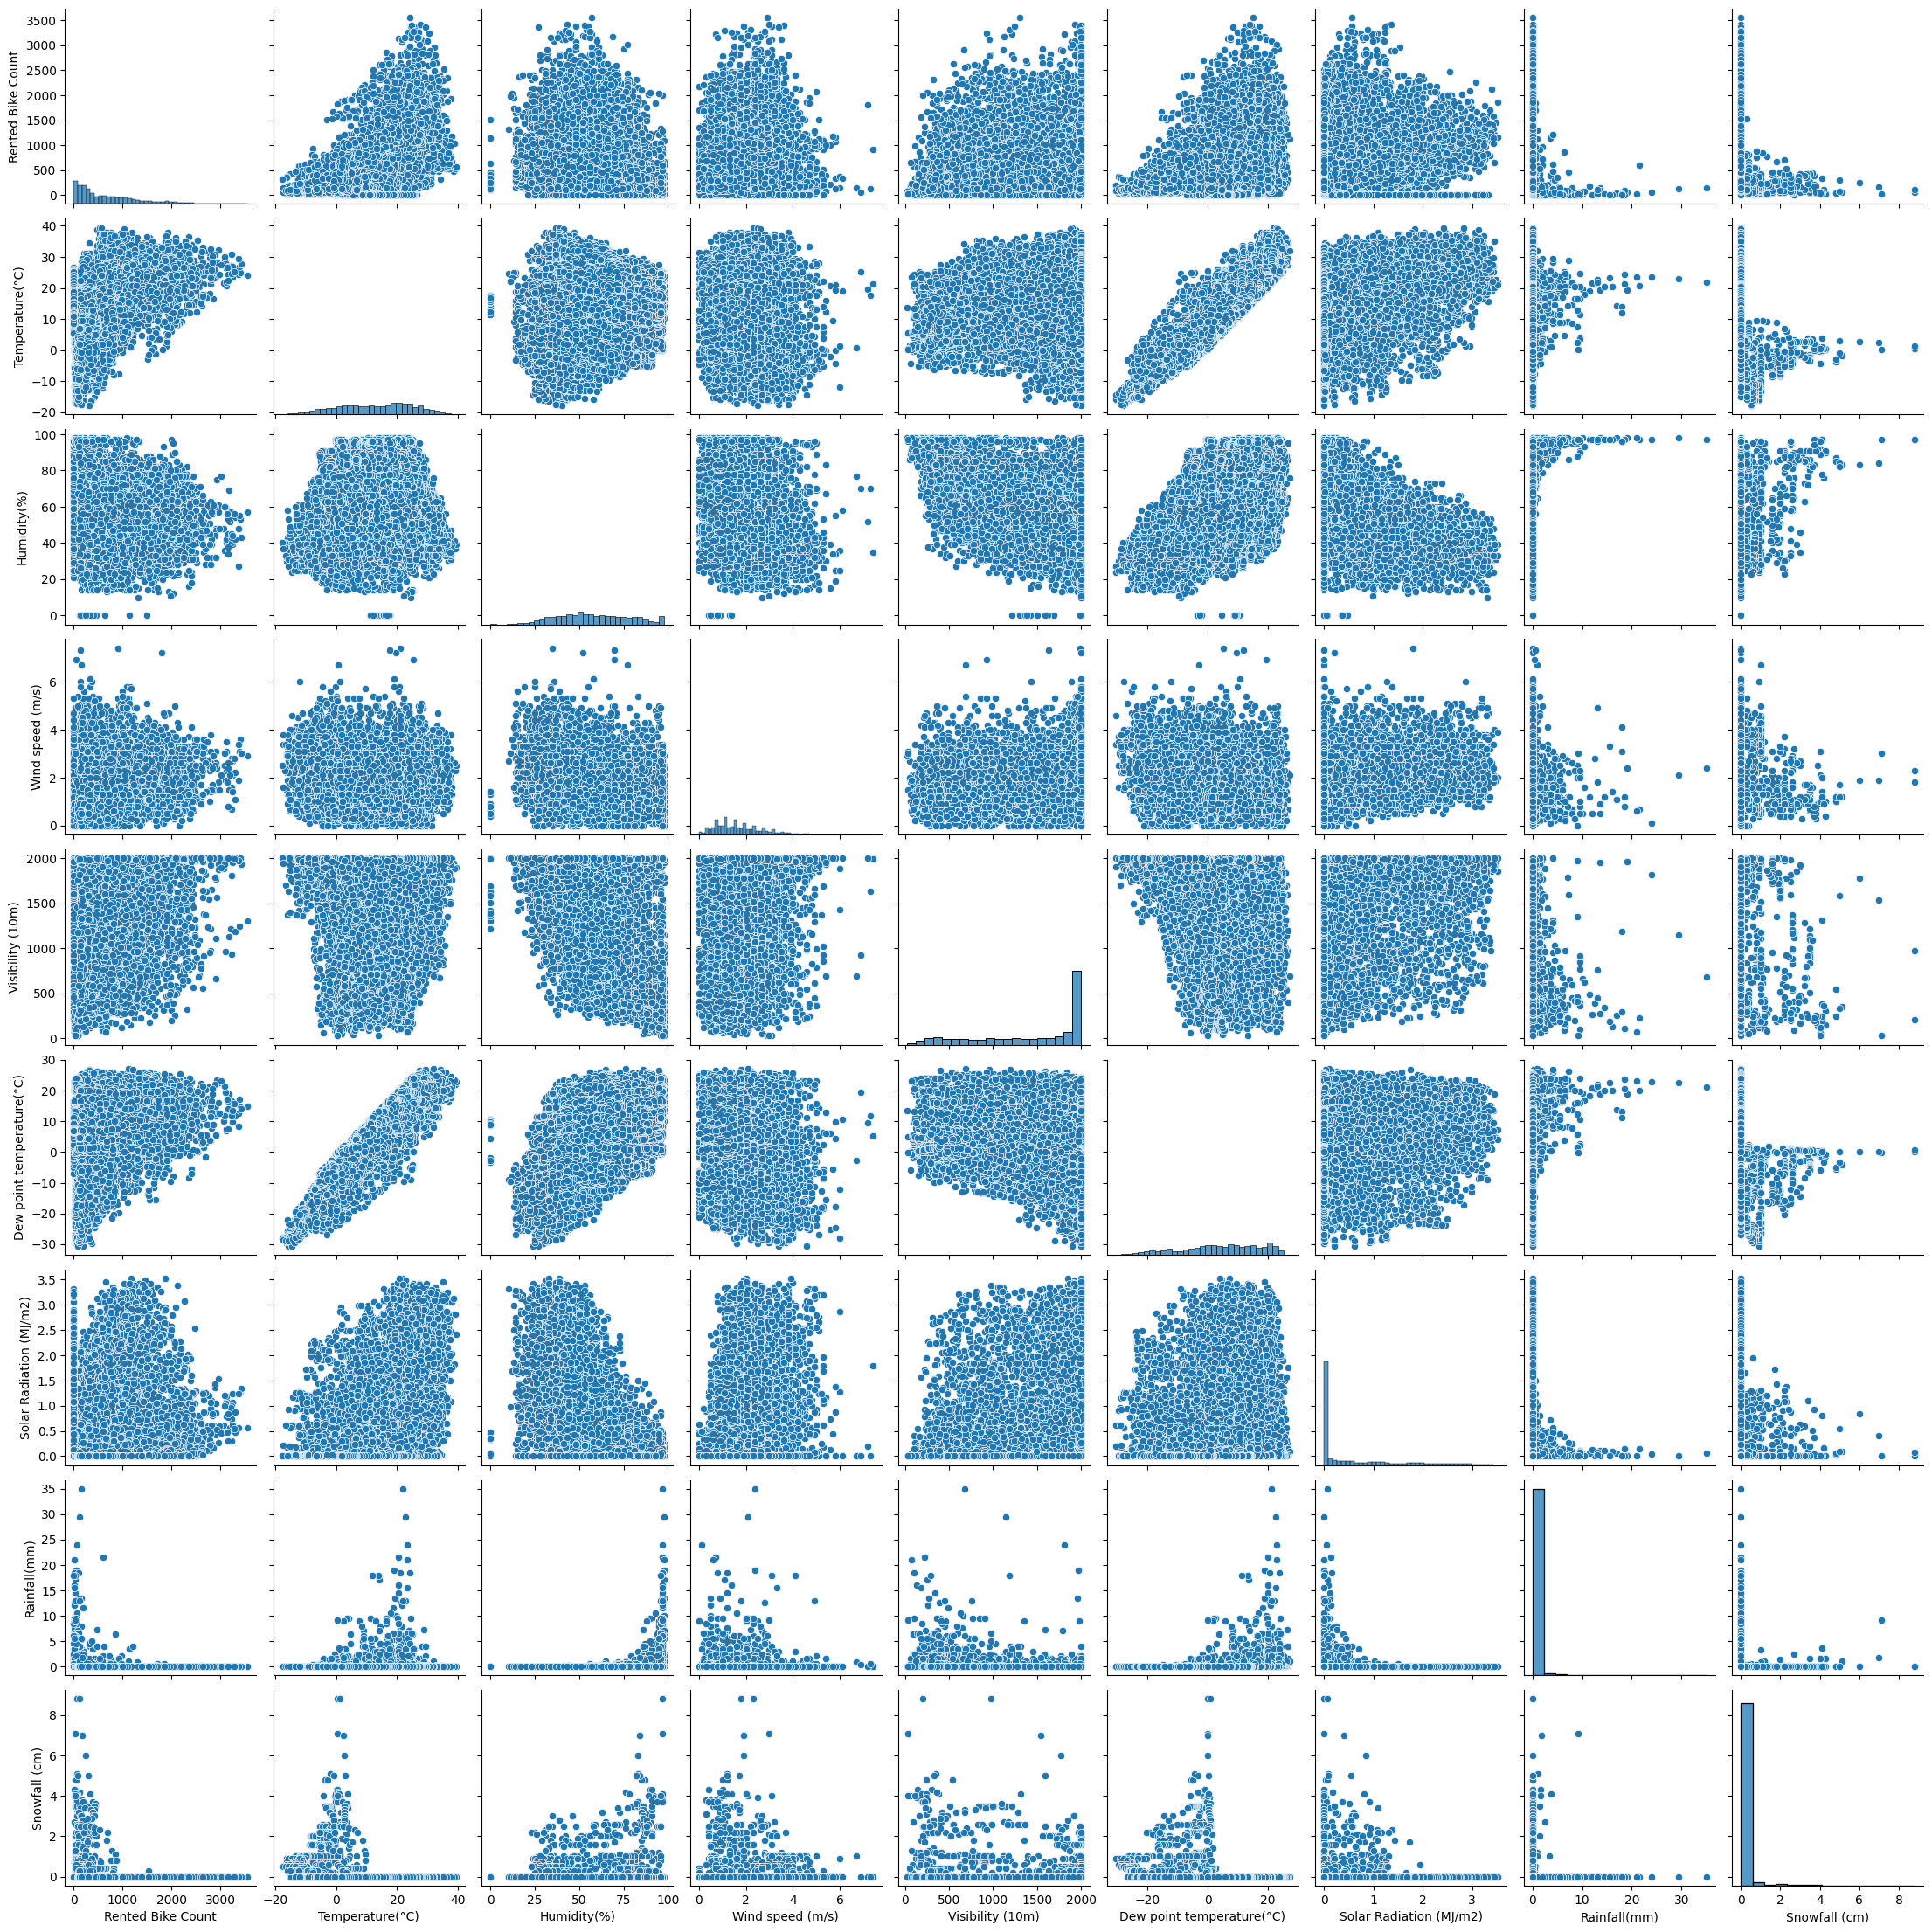

In [45]:
# Let's plot pairplot to see the relationship amongs the vairables of the dataframe.
sns.pairplot(data=bkdf)
plt.show()

##**Normalization and preprocessing of data**

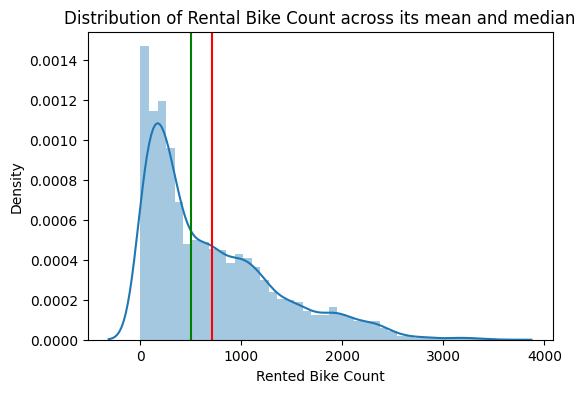

In [46]:
# Let's plt distribution of Rented Bike Count, it's mean and median to see it's it's distribution.
plt.figure(figsize=(6,4))
plt.title('Distribution of Rental Bike Count across its mean and median')
plt.xlabel('Rental Bike Count')
plt.ylabel('Density')
ax=sns.distplot(bkdf['Rented Bike Count'],hist=True)
ax.axvline(bkdf['Rented Bike Count'].mean(), color= 'red')
ax.axvline(bkdf['Rented Bike Count'].median(), color= 'green')
plt.show()

* ***The above graph shows that Rented Bike Count is moderately right skewed. Since the assumption of linear regression is that 'dependent variables has to be normally distributed', so we should perform some operation to make it normally distributed.***

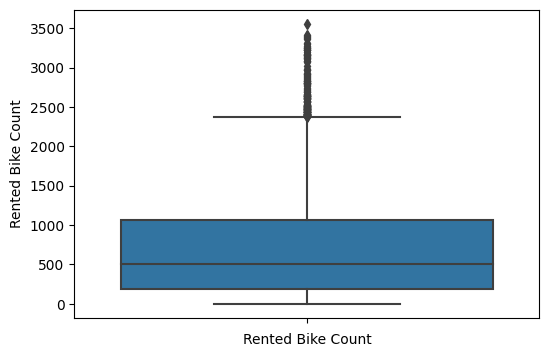

In [47]:
# Let's check outliers for Rented Bike Count by using boxplot.
plt.figure(figsize=(6,4))
plt.xlabel('Rented Bike Count')
sns.boxplot(y=bkdf['Rented Bike Count'])
plt.show()

***By using the above box plot we have detected outliers.***

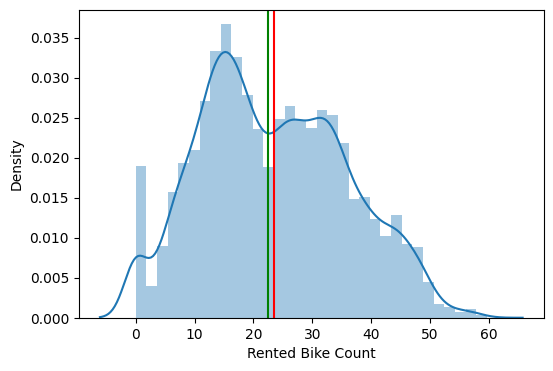

In [48]:
# let's apply square root to Rented Bike Count to normalise it's skewness.
plt.figure(figsize=(6,4))
plt.xlabel('Rental Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bkdf['Rented Bike Count']))
ax.axvline(np.sqrt(bkdf['Rented Bike Count']).mean(), color= 'red')
ax.axvline(np.sqrt(bkdf['Rented Bike Count']).median(), color='green')
plt.show()

* ***So, now we have almost normally skewed disribution for Rented Bike Count .***

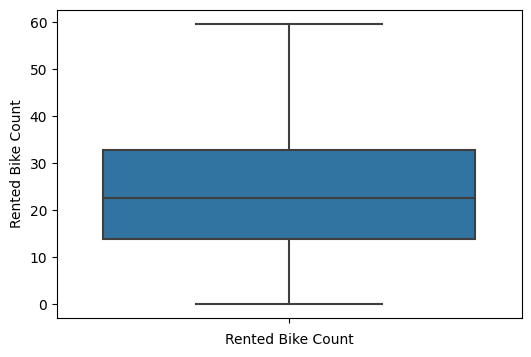

In [49]:
# Let's cross check, if we have any outliers for Rented Bike Count
plt.figure(figsize=(6,4))
plt.xlabel('Rented Bike Count')
sns.boxplot(y=np.sqrt(bkdf['Rented Bike Count']))
plt.show()

***yes, it is confirm that we don,t have any outliers for 'Rented Bike Count'.***

In [50]:
# Let's check correlation among variables of the dataframe.
bkdf.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

***From this we can say that for 'Rented Bike Count' there is a positive correlation with 'temperature(0.53)', 'Wind speed(0.12)',  'Visibility	(0.19)',  'Dew point temperature	(0.37)' and 'Solar Radiation	(0.26)'. Also we have found some negative correlations for 'rented bike count' with 'humidity', 'rainfall' and 'snowfall' ***

*** Let's fit ordinary least Squre (OLS) Model ***

**Ordinary least squares (OLS) regression is a statistical method of analysis which is carried out to estimates the relationship between one or more independent variables and a dependent variable**

In [51]:
bkdf.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [52]:
# Let's import the module from statsmodels
#assign the 'x','y' values for the model
import statsmodels.api as sm
X = bkdf[[ 'Temperature(°C)','Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
Y = bkdf['Rented Bike Count']
bkdf.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
0           0.0            0.0  Winter  No Holiday             Yes    12   
1           0.0            0.0  Winter  No Holiday             Yes    12   
2           0.0            0.0  Winter  No Holiday             Yes    12   
3           0.0            0.0  Winter  No Holiday             Yes    12   
4           0.0            0.0  Winter  No Holiday             Yes    12   

  weekdays_weekend  
0                0  
1                0  
2                0  
3                0  
4                0

In [53]:
# Let's add a constant column to dataframe
X = sm.add_constant(X)
X

const  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0       1.0             -5.2           37               2.2              2000   
1       1.0             -5.5           38               0.8              2000   
2       1.0             -6.0           39               1.0              2000   
3       1.0             -6.2           40               0.9              2000   
4       1.0             -6.0           36               2.3              2000   
...     ...              ...          ...               ...               ...   
8755    1.0              4.2           34               2.6              1894   
8756    1.0              3.4           37               2.3              2000   
8757    1.0              2.6           39               0.3              1968   
8758    1.0              2.1           41               1.0              1859   
8759    1.0              1.9           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8755            0.0  
8756            0.0  
8757            0.0  
8758            0.0  
8759            0.0  

[8760 rows x 9 columns]

In [54]:
## fit a Ordinary Least Squre model
OLSmodel= sm.OLS(Y, X).fit()
OLSmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:47:07   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature(°C)              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity(%)                 -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind speed (m/s)             52.4810      5.661      9.271      0.000      41.385      63.577
Visibility (10m)             -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew point temperature(°C)    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar Radiation (MJ/m2)    -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall(mm)                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall (cm)                41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


* **R sqauared and Adj R Square values are nearly same. About 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 at 5% level of significance.**
*  **P value for dew point temp and visibility are very high and which is not significant.**
*  **Omnibus tests the skewness and kurtosis of the residuals. Here we find the value of Omnibus is high., it means we have skewness in our data.**
*  **The condition number is large, i.e 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for auto correlation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among some variables of the dataframe.**


In [55]:
# lets check correlation for the added column
X.corr()

const  Temperature(°C)  Humidity(%)  \
const                        NaN              NaN          NaN   
Temperature(°C)              NaN         1.000000     0.159371   
Humidity(%)                  NaN         0.159371     1.000000   
Wind speed (m/s)             NaN        -0.036252    -0.336683   
Visibility (10m)             NaN         0.034794    -0.543090   
Dew point temperature(°C)    NaN         0.912798     0.536894   
Solar Radiation (MJ/m2)      NaN         0.353505    -0.461919   
Rainfall(mm)                 NaN         0.050282     0.236397   
Snowfall (cm)                NaN        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
const                                   NaN               NaN   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
const                                            NaN                      NaN   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
const                               NaN            NaN  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

<Axes: >

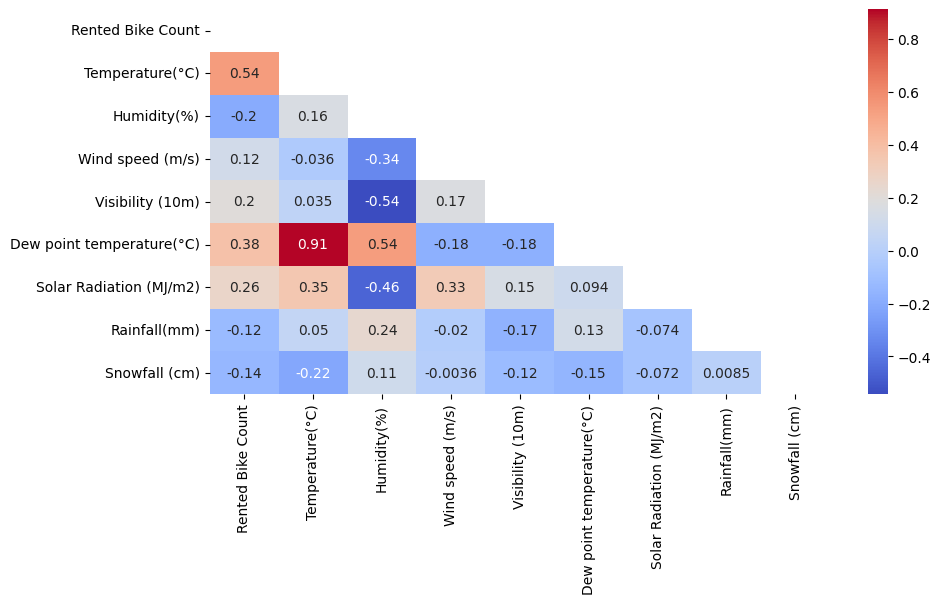

In [56]:
# Let's see correlation graphically with the help of heatmap.
## plot the Correlation matrix heatmap
plt.figure(figsize=(10,5))
correlation_matrix=bkdf.corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap((correlation_matrix),cmap='coolwarm', annot= True, mask=mask)

* ***From the above correlation heatmap, We see that there is a strong positive
correlation between variables 'Temperature' and 'Dew point temperature' i.e 0.91 so, even if we drop one of this column then it don't affects the outcome of our analysis. so, let's drop the column 'Dew point temperature(°C)'.***

In [57]:
# Drop variable 'Dew point temperature'.
bkdf=bkdf.drop(['Dew point temperature(°C)'],axis=1)

In [58]:
# Let's check the info of dataframe as we dropped one variable i.e "Dew point temperature"
bkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

## Let's create the required dummy variables

**Our dataframe contains various type of values, some of it consists of categorical values. So, in-order to use this categorical values for analysis purpose efficiently we need to create some dummy variables for those.**

In [59]:
# Assign all catagoriacal features/columns to a variable to make dummies
# Let's find the variables which have categorical values
categorical_feat=list(bkdf.select_dtypes(['object','category']).columns)
categorical_feat=pd.Index(categorical_feat)
categorical_feat

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

### Let's do one hot encoding

**As Many machine learning algorithms cannot work with categorical data directly So, we need to convert the categorical variable to numeric. **

In [60]:
#creat a copy of dataframe and do one hot encoding over it
bkdf_copy = bkdf

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data
# use for loop to do one hot encoding over each values of categorical_feat
for col in categorical_feat:
    bkdf_copy = one_hot_encoding(bkdf_copy, col)
bkdf_copy.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Hour_1  Hour_2  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0       0  ...        0        0        0        0        0        0   
1       1       0  ...        0        0        0        0        0        0   
2       0       1  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 48 columns]

#**Let's do Model Training**

**Train Test split**

In regression tasks, we typically need to split the dataset into two parts: a training set and a test set. The training set is used to train the regression model, and the test set is used to evaluate the model's performance on unseen data. This process is known as "Train-Test Split."

In [61]:
# Assign the value for X and Y variables for regression fitting
X = bkdf_copy.drop(columns=['Rented Bike Count'], axis=1)
Y = np.sqrt(bkdf_copy['Rented Bike Count'])

In [62]:
# Let's see the x varialbe data
X.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
0                      0.0           0.0            0.0       0       0   
1                      0.0           0.0            0.0       1       0   
2                      0.0           0.0            0.0       0       1   
3                      0.0           0.0            0.0       0       0   
4                      0.0           0.0            0.0       0       0   

   Hour_3  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0  ...        0        0        0        0        0        0   
1       0  ...        0        0        0        0        0        0   
2       0  ...        0        0        0        0        0        0   
3       1  ...        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 47 columns]

In [63]:
# Let's see the y varialbe data
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [64]:
# Let's Creat trainning and testing datasets, for this train test split model has to import from scikit learn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)
# Let's see X datasset shape
print(X_train.shape)
print(X_test.shape)

(6132, 47)
(2628, 47)


In [65]:
# Let's import linear regression model from scikit learn
from sklearn.linear_model import LinearRegression
LR= LinearRegression().fit(X_train, Y_train)

In [66]:
#check the r2 score of the linear regression model
# The R-squared value measures how well the linear regression model explains the variance in the target variable (Y) based on the predictor variables (X).
LR.score(X_train, Y_train)

0.7735538545244831

In [67]:
# Let's check the coefficient values of the linear regression model
LR.coef_

array([ 5.06409442e-01, -1.31832585e-01, -2.95726531e-02,  9.94007084e-04,
        8.31713759e-01, -1.49348764e+00, -5.37062680e-02, -2.25126487e+00,
       -4.99006373e+00, -7.35905711e+00, -9.49479022e+00, -8.97758528e+00,
       -4.04211743e+00,  2.32874842e+00,  7.48265247e+00,  1.14220456e+00,
       -3.26382769e+00, -3.62210895e+00, -2.89996452e+00, -2.94011118e+00,
       -3.29743736e+00, -2.08789080e+00,  1.79520578e-01,  3.65430099e+00,
        1.00931648e+01,  6.65353785e+00,  5.83638625e+00,  6.16960119e+00,
        4.88538499e+00,  1.27464572e+00, -3.12529632e+09,  7.32848255e+09,
       -3.19597701e+09,  3.67478997e+00,  2.82525975e+01, -7.25154628e-01,
       -7.06806874e+07, -7.06806866e+07, -7.06806839e+07, -1.05244595e+10,
       -1.05244596e+10, -1.05244596e+10, -3.19597700e+09, -3.19597700e+09,
       -3.19597700e+09,  2.07090954e+00, -1.38817613e+00])

In [68]:
# Let's get the predicted values for X_train and X-test values
Y_pred_train= LR.predict(X_train)
Y_pred_test= LR.predict(X_test)


In [69]:
print(Y_pred_train)

[24.49999666 36.26116514 27.6571517  ... 34.22142649 22.93761206
 21.07662964]


In [70]:
# Let's check the accuracy of a linear regression model with some evaluation metrics for training dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# Now calculate MSE
MSE_LR= mean_squared_error((Y_train), (Y_pred_train))
print("MSE :",MSE_LR)

# Now calculate RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)


# Now calculate MAE
MAE_LR= mean_absolute_error(Y_train, Y_pred_train)
print("MAE :",MAE_LR)



# Let's import r2 score packages

from sklearn.metrics import r2_score
# Now calculate r2 and adjusted r2
r2_LR= r2_score(Y_train, Y_pred_train)
print("r2 :",r2_LR)
Adjusted_r2_LR = (1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.224265900543436
RMSE : 5.935003445706113
MAE : 4.479618816247486
r2 : 0.7735538545244831
Adjusted r2 : 0.7694286728045803


The MSE is 35.224265900543436. It represents the average squared difference between the predicted values and the actual target values. A lower MSE is desirable, indicating that the model's predictions are closer to the actual values on average.

The RMSE is 5.935003445706113, which is the square root of the MSE. A lower RMSE value indicates better model performance, as it means the model's predictions have less error on average.

The MAE is 4.479618816247486. MAE represents the average absolute difference between the predicted values and the actual target values. Like RMSE, MAE is in the same unit as the target variable and is less sensitive to outliers. A lower MAE value is preferred, as it indicates better model accuracy

The R-squared value is 0.7735538545244831, which represents the proportion of variance in the target variable explained by the model. An R-squared value closer to 1 indicates that the model explains a larger proportion of the variance. In our case, approximately 77.36% of the variance in the target variable is explained by the model. This is a relatively good fit.

The adjusted R-squared value is 0.7694286728045803. Adjusted R-squared considers the number of predictors in the model and penalizes the addition of unnecessary predictors. It is slightly lower than the R-squared value in our case, which suggests that the model with predictors explains slightly less variance after considering the number of predictors.

In [71]:
# Let's store the train set metrics value in a dataframe for later comparison
dict_1={'Model':'Linear regression',
       'MAE':round((MAE_LR),3),
       'MSE':round((MSE_LR),3),
       'RMSE':round((RMSE_LR),3),
       'r2_score':round((r2_LR),3),
       'Adjusted r2':round((Adjusted_r2_LR),2)
       }
train_df=pd.DataFrame(dict_1,index=[1])

In [72]:
# Let's check the accuracy of a linear regression model with some evaluation metrics for test dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# let's calculate MSE
MSE_LR= mean_squared_error(Y_test, Y_pred_test)
print("MSE :",MSE_LR)

# let's calculate RMSE
RMSE_LR=np.sqrt(MSE_LR)
print("RMSE :",RMSE_LR)


# Let's calculate MAE
MAE_LR= mean_absolute_error(Y_test, Y_pred_test)
print("MAE :",MAE_LR)


#Let's import the packages
from sklearn.metrics import r2_score
# Now calculate r2 and adjusted r2
r2_LR= r2_score((Y_test), (Y_pred_test))
print("r2 :",r2_LR)
Adjusted_r2_lr = (1-(1-r2_score((Y_test), (Y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted r2 :",Adjusted_r2_LR )


MSE : 33.34785137966983
RMSE : 5.774759854718621
MAE : 4.428339821579641
r2 : 0.7828888869222996
Adjusted r2 : 0.7694286728045803


The MSE is 33.34785137966983. It represents the average squared difference between the predicted values and the actual target values. A lower MSE is generally better, indicating that the model's predictions are closer to the actual values on average. The MSE value suggests that, on average, the squared difference between the predicted and actual values is approximately 33.35.

The RMSE is 5.774759854718621, which is the square root of the MSE. RMSE is in the same unit as the target variable, making it more interpretable. A lower RMSE value indicates better model performance, as it means the model's predictions have less error on average. In our case, the RMSE indicates that, on average, the absolute difference between the predicted and actual values is approximately 5.77 units.

The MAE is 4.428339821579641. MAE represents the average absolute difference between the predicted values and the actual target values. Like RMSE, MAE is in the same unit as the target variable and is less sensitive to outliers. A lower MAE value is preferred, as it indicates better model accuracy. The MAE value suggests that, on average, the absolute difference between the predicted and actual values is approximately 4.43 units.


The R-squared value is 0.7828888869222996. R-squared represents the proportion of variance in the target variable that is explained by the model. An R-squared value closer to 1 indicates that the model explains a larger proportion of the variance in the target variable. In our case, approximately 78.29% of the variance in the target variable is explained by the model. This is a relatively good fit, suggesting that our model is capturing a substantial portion of the target variable's variability.

The adjusted R-squared value is 0.7694286728045803. Adjusted R-squared considers the number of predictors in the model and penalizes the addition of unnecessary predictors. It is slightly lower than the R-squared value in our case, which suggests that the model with predictors explains slightly less variance after accounting for the number of predictors. Adjusted R-squared is a more appropriate metric when dealing with multiple predictors.

In [73]:
# Let's store the test data set metrics value in a dataframe for later comparison

dict_2={'Model':'Linear regression',
       'MAE':round((MAE_LR),3),
       'MSE':round((MSE_LR),3),
       'RMSE':round((RMSE_LR),3),
       'r2_score':round((r2_LR),3),
       'Adjusted r2':round((Adjusted_r2_LR ),2)
       }
test_df=pd.DataFrame(dict_2,index=[1])

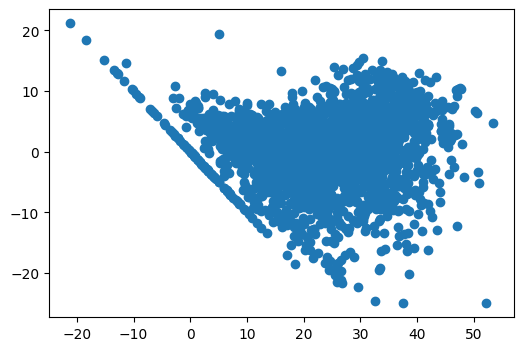

In [74]:
### Let's see Heteroscadacity between y_pred_test and (y_test)-(y_pred_test)
plt.figure(figsize=(6,4))
plt.scatter((Y_pred_test),(Y_test)-(Y_pred_test))

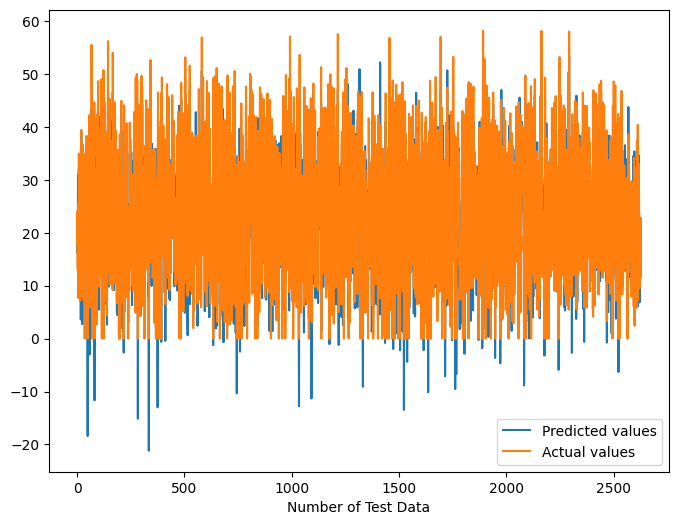

In [75]:
#Let's Plot the figure
plt.figure(figsize=(8,6))
plt.plot(Y_pred_test)
plt.plot(np.array(Y_test))
plt.legend(["Predicted values","Actual values"])
plt.xlabel('Number of Test Data')
plt.show()

#**FITTING LASSO REGRESSION**

In ordinary linear regression, the goal is to fit a linear model that minimizes the sum of squared residuals between the predicted values and the actual values. However, when there are many features in the dataset, ordinary linear regression may lead to overfitting, especially if some of the features are irrelevant or redundant.

Lasso Regression addresses this issue by adding a penalty term to the linear regression equation, forcing some of the coefficients to be exactly zero. This effectively performs variable selection by automatically removing less important features from the model. The regularization term in Lasso is the sum of the absolute values of the regression coefficients multiplied by a hyperparameter called alpha (λ).

In [76]:
# Importing lasso regression and creating instance for it.
from sklearn.linear_model import Lasso
Lasso_Reg = Lasso(alpha=1.0, max_iter=3000)
# Now Fit the Lasso regression model
Lasso_Reg.fit(X_train, Y_train)
# Let's check the model score
print(Lasso_Reg.score(X_test, Y_test), Lasso_Reg.score(X_train, Y_train))

0.3922842252365728 0.4046891968249039


A test set score of 0.392 means that the model explains approximately 39.2% of the variance in the target variable on the test data. The test set score is crucial because it indicates how well our model is likely to perform on new, real-world data.

A training set score of 0.405 means that the model explains approximately 40.5% of the variance in the target variable on the training data. It shows how well the model has learned the patterns present in the training data.
The training set score (0.405) is slightly higher than the test set score (0.392), which indicate a slight degree of overfitting.
The test set score (0.392) is lower than the training set score (0.405), which is a common scenario and we can expect this in most cases. It indicates that the model's performance on unseen data is slightly worse than on the training data. However, the difference between the two scores is not substantial, which is a positive sign of us.

In [77]:
#Let's find the predicted values for x train and x test
Y_pred_train_Lasso_Reg=Lasso_Reg.predict(X_train)
Y_pred_test_Lasso_Reg=Lasso_Reg.predict(X_test)

In [78]:
# Let's check the accuracy of a lasso regression model with some evaluation metrics for train dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# Now calculate MSE
MSE_Lasso_Reg= mean_squared_error((Y_train), (Y_pred_train_Lasso_Reg))
print("MSE :",MSE_Lasso_Reg)

# Now calculate RMSE
RMSE_Lasso_Reg=np.sqrt(MSE_Lasso_Reg)
print("RMSE :",RMSE_Lasso_Reg)


# Let's calculate MAE
MAE_Lasso_Reg= mean_absolute_error(Y_train, Y_pred_train_Lasso_Reg)
print("MAE :",MAE_Lasso_Reg)

# Let's import r2 score module
from sklearn.metrics import r2_score
# let's calculate r2 and adjusted r2
r2_Lasso_Reg= r2_score(Y_train, Y_pred_train_Lasso_Reg)
print("R2 :",r2_Lasso_Reg)
Adjusted_r2_Lasso_Reg = (1-(1-r2_score(Y_train, Y_pred_train_Lasso_Reg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score(Y_train, Y_pred_train_Lasso_Reg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.60208859140351
RMSE : 9.622997900415625
MAE : 7.286126565995105
R2 : 0.4046891968249039
Adjusted r2 : 0.39384438761977625


Mean Squared Error (MSE): The MSE value of 92.60208859140351 measures the average squared difference between the predicted values and the actual values. Lower MSE values are better, indicating smaller prediction errors. for our model, the MSE indicates that, on average, the squared difference between the predicted and actual values is 92.60.

Root Mean Squared Error (RMSE): The RMSE value of 9.622997900415625 is the square root of the MSE. RMSE represents the average absolute difference between the predicted values and the actual values. Like MSE, lower RMSE values indicate better model performance. for our model, the RMSE indicates that, on average, the absolute difference between the predicted and actual values is approximately 9.62.

Mean Absolute Error (MAE): The MAE value of 7.286126565995105 represents the average absolute difference between the predicted values and the actual values. Lower MAE values are better, indicating smaller absolute prediction errors. for our model, the MAE indicates that, on average, the absolute difference between the predicted and actual values is approximately 7.29.

R-squared (R2): The R-squared value of 0.4046891968249039 measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in our model. R2 ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model cannot explain any variance. In our case, the R2 value of approximately 0.40 means that your Lasso Regression model explains approximately 40.47% of the variance in the target variable. It is considered a moderate fit, suggesting that your model captures some but not all of the underlying patterns in the data.

Adjusted R-squared: The Adjusted R-squared value of 0.39384438761977625 is a modified version of R2 that takes into account the number of features and the sample size. It penalizes the inclusion of irrelevant features and rewards the inclusion of useful features. Adjusted R-squared is generally preferred over R-squared when dealing with multiple features. In our case, the Adjusted R-squared is slightly lower than R-squared, which suggests that some features in your model may not be contributing significantly to the variance explained.

In [79]:
# Let's store the test set metrics values of lasso regression in a dataframe for later comparison
dict_1 ={'Model':'Lasso regression',
       'MAE':round((MAE_Lasso_Reg),3),
       'MSE':round((MSE_Lasso_Reg),3),
       'RMSE':round((RMSE_Lasso_Reg),3),
       'r2_score':round((r2_Lasso_Reg),3),
       'Adjusted r2':round((Adjusted_r2_Lasso_Reg ),2)
       }
train_df = train_df.append(dict_1,ignore_index=True)

In [80]:
# Let's check the accuracy of a lasso regression model with some evaluation metrics for test dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# let's calculate MSE
MSE_Lasso_Reg= mean_squared_error(Y_test, Y_pred_test_Lasso_Reg)
print("MSE :",MSE_Lasso_Reg)

# Now calculate RMSE
RMSE_Lasso_Reg=np.sqrt(MSE_Lasso_Reg)
print("RMSE :",RMSE_Lasso_Reg)


#  Let's calculate MAE
MAE_Lasso_Reg= mean_absolute_error(Y_test, Y_pred_test_Lasso_Reg)
print("MAE :",MAE_Lasso_Reg)

# Import r2 module
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_Lasso_Reg= r2_score((Y_test), (Y_pred_test_Lasso_Reg))
print("R2 :",r2_Lasso_Reg)
Adjusted_R2_Lasso_Reg=(1-(1-r2_score((Y_test), (Y_pred_test_Lasso_Reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score((Y_test), (Y_pred_test_Lasso_Reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 93.34397972819944
RMSE : 9.661468818362943
MAE : 7.3358839873346975
R2 : 0.3922842252365728
Adjusted r2 : 0.3812134339908825


Mean Squared Error (MSE): The MSE value of 93.34397972819944 measures the average squared difference between the predicted values and the actual values on the test dataset. As with the training dataset, lower MSE values are better, indicating smaller prediction errors. In this case, the MSE indicates that, on average, the squared difference between the predicted and actual values is 93.34.

Root Mean Squared Error (RMSE): The RMSE value of 9.661468818362943 is the square root of the MSE. RMSE represents the average absolute difference between the predicted values and the actual values on the test dataset. Like MSE, lower RMSE values indicate better model performance. In this case, the RMSE indicates that, on average, the absolute difference between the predicted and actual values is approximately 9.66.

Mean Absolute Error (MAE): The MAE value of 7.3358839873346975 represents the average absolute difference between the predicted values and the actual values on the test dataset. Lower MAE values are better, indicating smaller absolute prediction errors. In this case, the MAE indicates that, on average, the absolute difference between the predicted and actual values is approximately 7.34.

R-squared (R2): The R-squared value of 0.3922842252365728 measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in your model on the test dataset. As with the training dataset, R2 ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model cannot explain any variance. In our case, the R2 value of approximately 0.39 means that our Lasso Regression model explains approximately 39.23% of the variance in the target variable on the test dataset.

Adjusted R-squared: The Adjusted R-squared value of 0.3812134339908825 is a modified version of R2 that takes into account the number of features and the sample size on the test dataset. Similar to the training dataset, it penalizes the inclusion of irrelevant features and rewards the inclusion of useful features. The adjusted R-squared is slightly lower than R-squared, which suggests that some features in our model may not be contributing significantly to the variance explained on the test dataset.

In [81]:
# Let's store the test set metrics value lasso regression in a dataframe for later comparison
dict_2={'Model':'Lasso regression',
       'MAE':round((MAE_Lasso_Reg),3),
       'MSE':round((MSE_Lasso_Reg),3),
       'RMSE':round((RMSE_Lasso_Reg),3),
       'r2_score':round((r2_Lasso_Reg),3),
       'Adjusted r2':round((Adjusted_r2_Lasso_Reg ),2),
       }
test_df=test_df.append(dict_2,ignore_index=True)

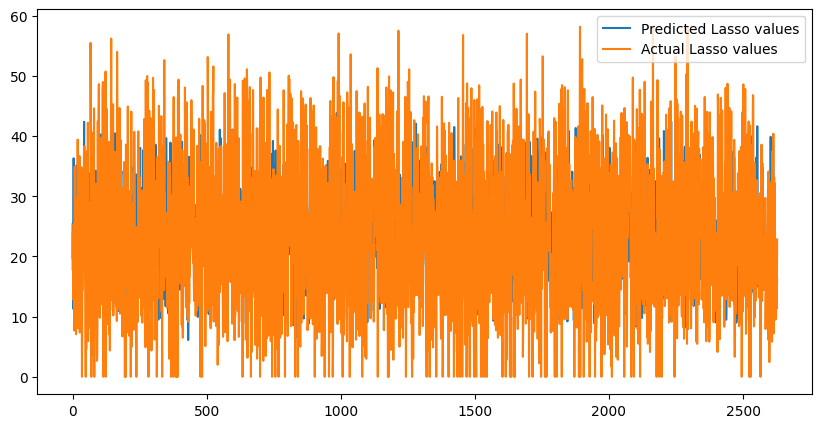

In [82]:
#Plot the figure for Y prdicted values of lasso model from test data
plt.figure(figsize=(10,5))
plt.plot(np.array(Y_pred_test_Lasso_Reg))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted Lasso values","Actual Lasso values"])
plt.show()

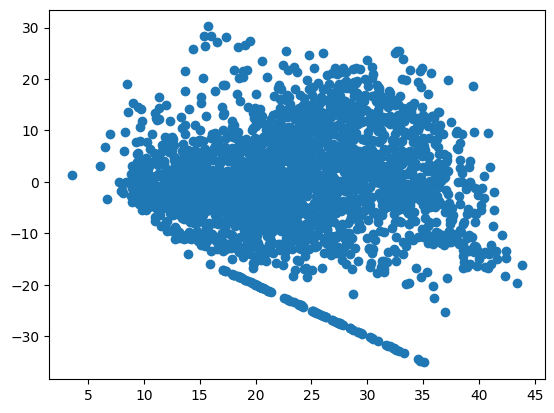

In [83]:
### Let's plot Heteroscadacity for y_pred_test_lasso and (y_test-y_pred_test_lasso)
plt.scatter((Y_pred_test_Lasso_Reg),(Y_test-Y_pred_test_Lasso_Reg))

# **LET'S FIT RIDGE REGRESSION MODEL**

In [84]:
#import the ridge model
from sklearn.linear_model import Ridge
Ridge= Ridge(alpha=0.1)
# LET's FIT THE MODEL
Ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [85]:
# Let's check the score of the ridge model
Ridge.score(X_train, Y_train)

0.7735537693580057

The R-squared value of 0.7735537693580057 indicates that our Ridge Regression model explains approximately 77.36% of the variance in the target variable on the training dataset. A high R-squared value like this is generally considered good as it suggests that our model captures a significant portion of the underlying patterns in the data.

The high R-squared value suggests that our Ridge Regression model is fitting the training data well. It can account for a substantial amount of the variance in the target variable, meaning it is capturing the relationships between the features and the target reasonably well.

The higher the R-squared value, the better our model's predictive power. A higher R-squared indicates that the model can make more accurate predictions on the training data.

In [86]:
# Let's get the predicted values for X_train and X-test from the ridge model
Y_pred_train_Ridge = Ridge.predict(X_train)
Y_pred_test_Ridge = Ridge.predict(X_test)

In [87]:
# Let's check the accuracy of a lasso regression model with some evaluation metrics for trinning dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# Let's calculate MSE
MSE_Ridge= mean_squared_error((Y_train), (Y_pred_train_Ridge))
print("MSE :",MSE_Ridge)

# Now calculate RMSE
RMSE_Ridge=np.sqrt(MSE_Ridge)
print("RMSE :",RMSE_Ridge)


# Let's calculate MAE
MAE_Ridge= mean_absolute_error(Y_train, Y_pred_train_Ridge)
print("MAE :",MAE_Ridge)


#import r2 packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2 for ridge model
r2_Ridge= r2_score(Y_train, Y_pred_train_Ridge)
print("R2 :",r2_Ridge)
Adjusted_r2_Ridge=(1-(1-r2_score(Y_train, Y_pred_train_Ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score(Y_train, Y_pred_train_Ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 35.224279148402616
RMSE : 5.935004561784482
MAE : 4.479732943443683
R2 : 0.7735537693580057
Adjusted r2 : 0.7694285860866206


Mean Squared Error (MSE): The MSE value of 35.224279148402616 measures the average squared difference between the predicted values and the actual values on the training dataset. Lower MSE values are better, indicating smaller prediction errors. In our case, the MSE indicates that, on average, the squared difference between the predicted and actual values is 35.22.

Root Mean Squared Error (RMSE): The RMSE value of 5.935004561784482 is the square root of the MSE. RMSE represents the average absolute difference between the predicted values and the actual values on the training dataset. Like MSE, lower RMSE values indicate better model performance. In this case, the RMSE indicates that, on average, the absolute difference between the predicted and actual values is approximately 5.94.

Mean Absolute Error (MAE): The MAE value of 4.479732943443683 represents the average absolute difference between the predicted values and the actual values on the training dataset. Lower MAE values are better, indicating smaller absolute prediction errors. In this case, the MAE indicates that, on average, the absolute difference between the predicted and actual values is approximately 4.48.

R-squared (R2): The R-squared value of 0.7735537693580057 measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in your Ridge Regression model on the training dataset. An R-squared of 0.77 means that our model explains approximately 77.36% of the variance in the target variable. It is considered a high R-squared value, suggesting that your Ridge Regression model captures a significant portion of the underlying patterns in the data.

Adjusted R-squared: The Adjusted R-squared value of 0.7694285860866206 is a modified version of R2 that takes into account the number of features and the sample size on the training dataset. Similar to R2, it penalizes the inclusion of irrelevant features and rewards the inclusion of useful features. The adjusted R-squared is slightly lower than R-squared, which suggests that some features in our model may not be contributing significantly to the variance explained.

In [88]:
# let's store the trainning set evaluation metrics values in a dataframe for later comparison
dict_1={'Model':'Ridge regression',
       'MAE':round((MAE_Ridge),3),
       'MSE':round((MSE_Ridge),3),
       'RMSE':round((RMSE_Ridge),3),
       'r2_score':round((r2_Ridge),3),
       'Adjusted r2':round((Adjusted_r2_Ridge ),2)}
train_df = train_df.append(dict_1,ignore_index=True)

In [89]:
# Let's check the accuracy of a lasso regression model with some evaluation metrics for test dataset.
# Let's import mean_squared_error from scikit learn.

from sklearn.metrics import mean_squared_error
# Let's calculate MSE
MSE_Ridge= mean_squared_error(Y_test, Y_pred_test_Ridge)
print("MSE :",MSE_Ridge)

# Now calculate RMSE
RMSE_Ridge=np.sqrt(MSE_Ridge)
print("RMSE :",RMSE_Ridge)


# Let's calculate MAE
MAE_Ridge= mean_absolute_error(Y_test, Y_pred_test_Ridge)
print("MAE :",MAE_Ridge)


#  Now import r2 package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2_Ridge= r2_score((Y_test), (Y_pred_test_Ridge))
print("r2 :",r2_Ridge)
Adjusted_r2_Ridge=(1-(1-r2_score((Y_test), (Y_pred_test_Ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score((Y_test), (Y_pred_test_Ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.34955413638217
RMSE : 5.774907283790984
MAE : 4.4285869307300265
r2 : 0.7828778011284683
Adjusted r2 : 0.7789224742498009


Mean Squared Error (MSE): The MSE value of 33.34955413638217 measures the average squared difference between the predicted values and the actual values on the test dataset. Lower MSE values are better, indicating smaller prediction errors. In this case, the MSE indicates that, on average, the squared difference between the predicted and actual values is 33.35.

Root Mean Squared Error (RMSE): The RMSE value of 5.774907283790984 is the square root of the MSE. RMSE represents the average absolute difference between the predicted values and the actual values on the test dataset. Like MSE, lower RMSE values indicate better model performance. In this case, the RMSE indicates that, on average, the absolute difference between the predicted and actual values is approximately 5.77.

Mean Absolute Error (MAE): The MAE value of 4.4285869307300265 represents the average absolute difference between the predicted values and the actual values on the test dataset. Lower MAE values are better, indicating smaller absolute prediction errors. In this case, the MAE indicates that, on average, the absolute difference between the predicted and actual values is approximately 4.43.

R-squared (R2): The R-squared value of 0.7828778011284683 measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in our Ridge Regression model on the test dataset. An R-squared of 0.78 means that our model explains approximately 78.29% of the variance in the target variable. It is considered a high R-squared value, suggesting that our Ridge Regression model performs well on the test dataset and captures a substantial portion of the underlying patterns in the data.

Adjusted R-squared: The Adjusted R-squared value of 0.7789224742498009 is a modified version of R2 that takes into account the number of features and the sample size on the test dataset. Similar to R2, it penalizes the inclusion of irrelevant features and rewards the inclusion of useful features. The adjusted R-squared is slightly lower than R-squared, which suggests that some features in our model may not be contributing significantly to the variance explained on the test dataset.

In [90]:
# Let's store the test set evaluation metrics values in a dataframe for later comparison
dict_2={'Model':'Ridge regression',
       'MAE':round((MAE_Ridge),3),
       'MSE':round((MSE_Ridge),3),
       'RMSE':round((RMSE_Ridge),3),
       'r2_score':round((r2_Ridge),3),
       'Adjusted r2':round((Adjusted_r2_Ridge ),2)}
test_df = test_df.append(dict_2,ignore_index=True)

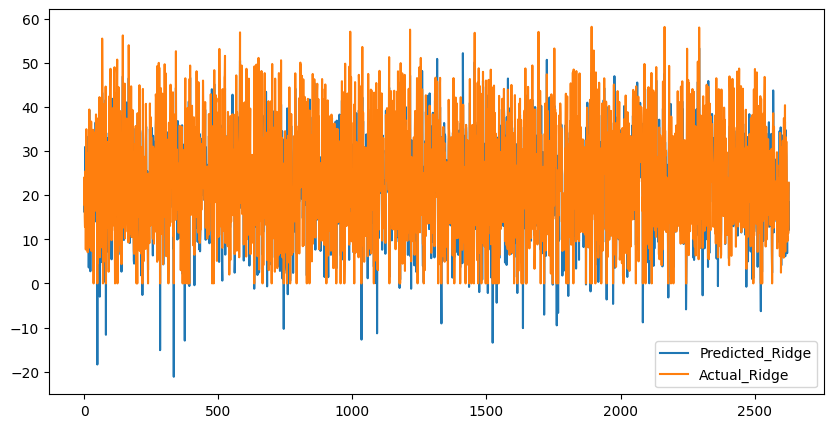

In [91]:
# Let's Plot the figure for y_pred_test_ridge
plt.figure(figsize=(10,5))
plt.plot((Y_pred_test_Ridge))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted_Ridge","Actual_Ridge"])
plt.show()

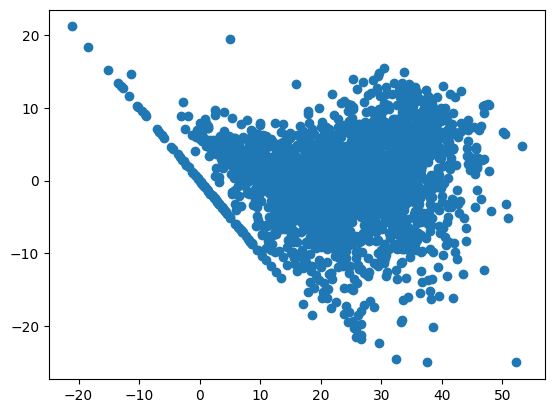

In [92]:
### Let's plot Heteroscadacity for y_pred_test_ridge and (y_test)-(y_pred_test_ridge)
plt.scatter((Y_pred_test_Ridge),(Y_test)-(Y_pred_test_Ridge))

Let's do hyper parameter tunning of Ridge model

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameters to tune
hyperparameters = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Create an instance of the Ridge estimator
ridge_model = Ridge()

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(ridge_model, hyperparameters, cv=5)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create a new Ridge model with the best hyperparameters
best_Ridge_model = Ridge(alpha=best_alpha)

# Train the model on the full training dataset
best_Ridge_model.fit(X_train, Y_train)

# Evaluate the model on the test dataset
Y_pred_best_Ridge = best_Ridge_model.predict(X_test)
MSE_best_Ridge = mean_squared_error(Y_test, Y_pred_best_Ridge)

print("Best alpha:", best_alpha)
print("MSE on test dataset:", MSE_best_Ridge)

Best alpha: 1.0
MSE on test dataset: 33.36597552246193


In [95]:
# Let's evaluate remaining matrix for hyper tunner ridge regression
# Now calculate RMSE
RMSE_best_Ridge = np.sqrt(MSE_best_Ridge)
print("RMSE :",RMSE_best_Ridge)


# Let's calculate MAE
MAE_best_Ridge = mean_absolute_error(Y_test, Y_pred_best_Ridge)
print("MAE :",MAE_best_Ridge)


#  Now import r2 package
from sklearn.metrics import r2_score

#calculate r2 and adjusted r2
r2_best_Ridge = r2_score((Y_test), (Y_pred_best_Ridge))
print("r2 :",r2_best_Ridge)
Adjusted_r2_best_Ridge =(1-(1-r2_score((Y_test), (Y_pred_best_Ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score((Y_test), (Y_pred_best_Ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


RMSE : 5.776328896666284
MAE : 4.430841800544817
r2 : 0.7827708897305055
Adjusted r2 : 0.7788136152410999


Conclusions over hyper parameter tunning done for ridge regression model:

Comparing the results before and after hyperparameter tuning, we can see that the differences in the evaluation metrics are very small:

MSE increased from 33.349 to 33.366
RMSE increased from 5.775 to 5.776
MAE increased from 4.429 to 4.431
R-squared (R2) decreased from 0.783 to 0.783 (slight decrease)
Adjusted R-squared decreased from 0.779 to 0.779 (slight decrease)

Overall, the differences are minimal, and both models are quite similar in terms of performance. The hyperparameter tuning did not result in a significant improvement in the model's predictive capabilities.

More models we have to try to find the best fit model for our dataset. Elastic Net regression is a popular linear regression technique which is particularly useful when dealing with datasets where the number of predictors (features) is much larger than the number of observations and as it combines the Lasso (L1 regularization) and Ridge (L2 regularization) regression methods and our score for lasso and ridge is already not much good as compared to linear regression, so let it leave to implement elastic net regression. Instead that we will try gradient boosting regresion and random forest regression.


In [96]:
# Let's display the results of evaluation metric values of all models
result = pd.concat([train_df, test_df], keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  r2_score  Adjusted r2
Training set 0  Linear regression  4.480  35.224  5.935     0.774         0.77
             1   Lasso regression  7.286  92.602  9.623     0.405         0.39
             2   Ridge regression  4.480  35.224  5.935     0.774         0.77
Test set     0  Linear regression  4.428  33.348  5.775     0.783         0.77
             1   Lasso regression  7.336  93.344  9.661     0.392         0.39
             2   Ridge regression  4.429  33.350  5.775     0.783         0.78

**Conclusion**

Based on above comparision, it appears that the Linear regression model outperforms Lasso and Ridge regression models for the given dataset. It has lower errors (MAE, MSE, RMSE) and better goodness-of-fit metrics (R2 score and Adjusted R2) on both the training and test datasets. Therefore, the Linear regression model is likely the most appropriate choice among the three models for making predictions on this bike sharing demand data.
Nevertheless, this is not the final conclusion. Given the time-dependent nature of the data, variables such as temperature, windspeed, and solar radiation may exhibit inconsistencies over time. Consequently, there will be instances where the model's performance may suffer. As Machine Learning is continuously advancing, it is essential to remain vigilant and prepared for any unforeseen circumstances. Regularly monitoring and updating our model will be crucial to its success. Thus, possessing a solid foundation of knowledge and staying abreast of the ever-evolving ML landscape will undoubtedly provide an advantage for the future.

# **RANDOM FOREST**

In [97]:
# Let's import random forest model
from sklearn.ensemble import RandomForestRegressor
# Let's Create an instance of the RandomForestRegressor
RF = RandomForestRegressor()
# let's fit the model
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [98]:
# let's get predicted values from the model

Y_pred_train_RF = RF.predict(X_train)
Y_pred_test_RF = RF.predict(X_test)

In [99]:
# let's check for evaluation matrix for random forest

from sklearn.metrics import mean_squared_error
print("Model Score:", RF.score(X_train,Y_train))

# let's calculate MSE
MSE_RF= mean_squared_error(Y_train, Y_pred_train_RF)
print("MSE :",MSE_RF)

# now calculate RMSE from SME
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)

# Now calculate MAE
MAE_RF= mean_absolute_error(Y_train, Y_pred_train_RF)
print("MAE :",MAE_RF)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_RF= r2_score(Y_train, Y_pred_train_RF)
print("R2 :",r2_RF)
Adjusted_r2_RF=(1-(1-r2_score(Y_train, Y_pred_train_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score(Y_train, Y_pred_train_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9891993768445486
MSE : 1.6800640219346095
RMSE : 1.2961728364437397
MAE : 0.8188279727379744
R2 : 0.9891993768445486
Adjusted r2 : 0.9890026213064455


Random Forest model seems to be performing exceptionally well on the given dataset, with high R2 scores(0.9892) and relatively low error metrics (MSE, RMSE, and MAE). It appears to be a robust model, accurately capturing the relationships in the data and making precise predictions

In [100]:
# Let's store the trainning set evalution metrixs value in a dataframe for later comparison
dict_1={'Model':'Random forest regression',
       'MAE':round((MAE_RF),3),
       'MSE':round((MSE_RF),3),
       'RMSE':round((RMSE_RF),3),
       'r2_score':round((r2_RF),3),
       'Adjusted r2':round((Adjusted_r2_RF ),2)}
train_df = train_df.append(dict_1,ignore_index=True)

In [101]:
# Let's check evalution matrix for test dataset for random forest model
# import the matrix

from sklearn.metrics import mean_squared_error
# now calculate MSE
MSE_RF= mean_squared_error(Y_test, Y_pred_test_RF)
print("MSE :",MSE_RF)

#calculate RMSE
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)


#calculate MAE
MAE_RF= mean_absolute_error(Y_test, Y_pred_test_RF)
print("MAE :",MAE_RF)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_RF= r2_score((Y_test), (Y_pred_test_RF))
print("R2 :",r2_RF)
Adjusted_r2_RF=(1-(1-r2_score((Y_test), (Y_pred_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted r2 :",1-(1-r2_score((Y_test), (Y_pred_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.50829039105934
RMSE : 3.5367061499450787
MAE : 2.241980896404893
R2 : 0.9185648029138817
Adjusted r2 : 0.9170812935095997


from this result, it seems our model to be performing quite well on the test dataset, but it might not be as accurate as the model evaluated on the training dataset (which had higher R2 (0.9892) and lower error metrics). It's common to observe a drop in performance when evaluating a model on unseen data (test dataset) compared to the performance on the training dataset. However, an R2 score of 0.9186 suggests that our model is still doing a decent job of explaining the variation in the target variable. To further improve the model's performance, we could consider feature engineering, hyperparameter tuning.

In [102]:
#  let's store the test set evalution metrixs value for random forest in a dataframe for later comparison
dict_2={'Model':'Random forest regression',
       'MAE':round((MAE_RF),3),
       'MSE':round((MSE_RF),3),
       'RMSE':round((RMSE_RF),3),
       'r2_score':round((r2_RF),3),
       'Adjusted r2':round((Adjusted_r2_RF ),2)}
test_df = test_df.append(dict_2,ignore_index=True)

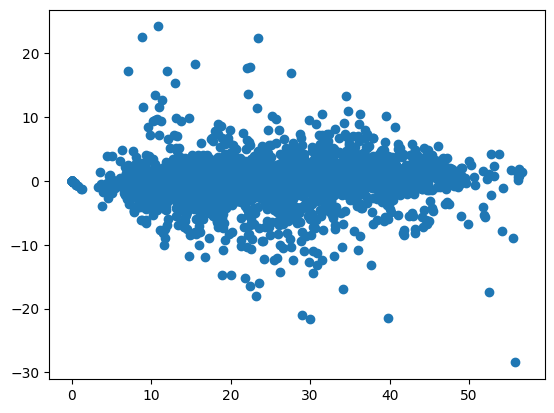

In [103]:
### let's plot Heteroscadacity
plt.scatter((Y_pred_test_RF),(Y_test)-(Y_pred_test_RF))